# <font color="bordo">ex1 - Linear regression with one variable</font>
<!-- http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb#Linear-regression-with-one-variable -->

In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Load data

In [9]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]] # add x_0 := 1
y = np.c_[data[:,1]]

### Plot data

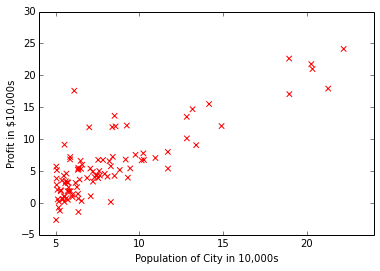

In [10]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

### Cost Function
<p>
Hypothesis: <font size="3em">$h_θ(x) = θ^Tx$</font>
<p>
Cost: <font size="3em">$J = \frac{1}{2m}\sum_{i=1}^m{\left(h_θ(x^{(i)})-y^{(i)}\right)^2}$</font>

In [28]:
def computeCost(X, y, theta=[[0],[0]]):
    
    h = X.dot(theta)
    
    m = y.size # number of samples
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [29]:
computeCost(X,y)

0.0